### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torch.nn as nn
from torch import Tensor
import torch.optim as optim

### Defining Hyperparameters

In [16]:
batch_size = 64
epochs = 20
image_dim = 32

### Data Preprocessing



In [3]:
# Not used in training script, just used to determine mean and standard deviation
# for normalization

'''
mean = std = 0.0
trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())

for images, _ in trainset:
  images = images.view(3, -1) # 3 for 3 channels (RGB)
  mean += images.mean(1)
  std += images.std(1)

# Calculate the means
mean /= len(trainset)
std /= len(trainset)

print(f'mean: {mean} std: {std}')
'''

"\nmean = std = 0.0\ntrainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())\n\nfor images, _ in trainset:\n  images = images.view(3, -1) # 3 for 3 channels (RGB)\n  mean += images.mean(1)\n  std += images.std(1)\n\n# Calculate the means\nmean /= len(trainset)\nstd /= len(trainset)\n\nprint(f'mean: {mean} std: {std}')\n"

In [13]:
mean = [0.5071, 0.4866, 0.4409]
std = [0.2009, 0.1984, 0.2023]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4866, 0.4409), (0.2009, 0.1984, 0.2023))
])

In [14]:
train_set = datasets.CIFAR100(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = datasets.CIFAR100(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [2]:

test_set = datasets.CIFAR100(
    root='./data',
    train=False,
    download=True,
)

Files already downloaded and verified


In [17]:
train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False
)

### Defining CNN Architecture

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3, 3), padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1)
        self.act2 = nn.ReLU()

        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1)
        self.act3 = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.act1(x)

        x = self.pool(self.conv2(x))
        x = self.act2(x)

        x = self.pool(self.conv3(x))
        x = self.act3(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)


        return x

In [ ]:
model = CNN()

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

val_loss_history = []
val_acc_history = []

for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'Epoch #: {epoch + 1}')
  # Validation
  model.eval()
  val_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      outputs = model(images)
      loss = loss_function(outputs, labels)
      val_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)
    print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')


print('training complete')

### **Validation**

In [19]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


  print('Accuracy on the test set: %d %%' % (100 * correct / total))

KeyboardInterrupt: 

### Plotting

NameError: name 'val_loss_history' is not defined

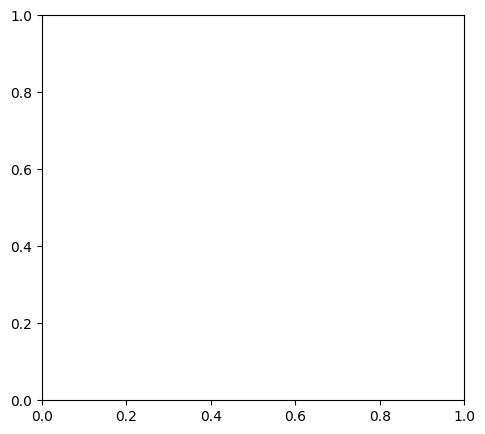

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()